**Ahil Rajwani - Michael Waugh - Data Bootcamp - Final Project**

# _How different causes of death have changed over the years._

**Principal Investigator:** Ahil Rajwani <br>
**Email:** [ahil.rajwani@stern.nyu.edu](ahil.rajwani@stern.nyu.edu)

<center>_"There are two things in life which are completely certain: death and taxes."_</center>

Although death is certain, the way in which we die has developed and changed over time due to various factors: GDP per capita, vehicle safety, development of medicine, and the advancement of technology just to name a few. This project will be analyzing how people die in the United States. I will be taking a look at several key correlations:<br>

1. Suicide Rates as a function of GDP per capita over time
2. Deaths as a function of vehicle miles travelled (VMT) over time
3. Concluding correlation analyzing the share of each cause of death over time

My project will include an in depth visualization of these correlations, however, I already have a few hyoptheses about what I am going to find in my analysis and graphical representations:

1. I expect suicides to increase in times of economic distress. In times such as the Great Depression and the Great Recession when things are rough for some members of the population due to the hault in the economy, unfortunately, I predict that there will be a number of people who will resort to ending their life as opposed to living under the poverty line, starving, or being homeless. 
<br> <br>
2. The amount of vehicle related deaths are expected to go down as we have made changes to vehicle safety features, legislation, etc. But I also expect to see dips in vehicle related deaths when people don't drive as much in times of economic distress when households cannot afford to spend on gas and car maintenance. 
<br><br>
3. I predict that diseases of the heart are going to be the leading cause of death over the years and that death by overdose of drugs has also increased in the share of the amount of deaths due to the prevalence of opiate addiction all across America. However, I do expect to see a decrease in death by diseases which have been cured such as Polio.
<br><br>

## <u> Suicide Rates as a function of GDP</u>

### Data Compilation and Manipulation

For my first correlation, (Suicide Rates as a function of GDP per capita), suicide rates was a statistic which was pretty difficult to find and some data had to be inputted manually. For the suicide statistics from 1900-1960 I had to input all the data manually from this [census document](https://www2.census.gov/library/publications/1960/compendia/hist_stats_colonial-1957/hist_stats_colonial-1957-chB.pdf) (page 10) and create my own [CSV file](https://github.com/ahilly/final_project/blob/master/Suicide_Rate_1900_1960.csv). 

For suicide rates 1960 onwards, that data was a little easier to deal with thankfully. OECD has the historical data via this very comprehensive database [(OECD iLibrary)](http://stats.oecd.org/BrandedView.aspx?oecd_bv_id=health-data-en&doi=data-00540-en). I was able to pick and choose what years and for what causes of death I wanted to pinpoint (suicides) and export as CSV document, which exported as [this](https://github.com/ahilly/final_project/blob/master/HEALTH_STAT_24042018192843590.csv).

**Compiling and cleaning up the suicide statistics:**

In [333]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
%matplotlib inline
import matplotlib.ticker as plticker #axis manipulation
import numpy as np #numerical operations and caluclations
import seaborn as sns #aesthetic
sns.set_style("darkgrid")
import geopandas as gpd #for our vehicle fatalities correlation

In [334]:
url1 = "https://raw.githubusercontent.com/ahilly"
url2 = "/final_project/master/Suicide_Rate_1900_1960.csv"
ahil_suicide = pd.read_csv(url1+url2) #read in the data found from the Census document

url3 = "/final_project/master/HEALTH_STAT_24042018192843590.csv"
oecd_suicide = pd.read_csv(url1+url3) #read in the data from OECD database

oecd_suicide = oecd_suicide.drop(["VAR", "Variable", "UNIT", "Measure", "COU","Country","YEA"],
                                 axis=1) 
#removed unnecessary columns/data

oecd_suicide = oecd_suicide.rename(index=str, 
                                   columns={"Value":"Suicide Deaths per 100000"}) 
#renamed columns

suicide = ahil_suicide.append(oecd_suicide, ignore_index = True) 
#append from the two sources into one dataframe

**Compiling the GDP per capita statistics:**

Moving on to the GDP per capita data, FRED only has data since 1947, but I really want to grab the great depression data as I wanted to explore the spike in suicides found in the early 1930s. I found this great [website](https://www.measuringworth.com/datasets/usgdp/result.php) allowing me to grab the GDP per capital data with all of the data in an easily accessible [csv file](https://github.com/ahilly/final_project/blob/master/USGDP_1900-2017.csv).

In [335]:
url4 = "/final_project/master/USGDP_1900-2017.csv"
gdp_per_capita = pd.read_csv(url1+url4, header=1) #first line of the file is a title 

gdp_per_capita.rename(index=str, 
                      columns={"Year": "Year", "Real GDP per capita (year 2009 dollars)": 
                               "GDPC"},
                      inplace = True) #lengthy name

gdp_per_capita["GDPC"] = gdp_per_capita["GDPC"].str.replace(",","")
#get rid of the commas so we can convert it from an object to float

gdp_per_capita["GDPC"] = pd.to_numeric(gdp_per_capita["GDPC"])
#to_numeric is a great function in the pandas function to convert the objects into floating point numbers

gdp_per_capita.dtypes

Year      int64
GDPC    float64
dtype: object

**Merge the suicide with the GDP per capita statistics:**

In [336]:
suicide_gdp = pd.merge(suicide, gdp_per_capita)
suicide_gdp.set_index("Year", inplace = True)
suicide_gdp.head()

,Suicide Deaths per 100000,GDPC
Year,,
1900,10.2,6003.90
1901,10.4,6201.16
1902,10.3,6389.64
1903,11.3,6456.30
1904,12.2,6111.43


**Calculate % Change Statistics:**

In [337]:
suicide_gdp["Suicide % Change"] = suicide_gdp["Suicide Deaths per 100000"].pct_change()*100
#pct_change method in the pandas package makes this easy for us 

suicide_gdp["GDPC % Change"] = (suicide_gdp["GDPC"]).pct_change()*100
#do the same for GDP per capita

suicide_gdp.tail() #let's see how it looks

,Suicide Deaths per 100000,GDPC,Suicide % Change,GDPC % Change
Year,,,,
2010,12.5,47720.0,2.459016,1.683358
2011,12.8,48125.0,2.400000,0.848701
2012,13.0,48841.0,1.562500,1.487792
2013,13.1,49317.0,0.769231,0.974591
2014,13.5,50216.0,3.053435,1.822901


### Data Presentation

I decided to go with a combined line graph mainly to highlight the inverse correlation between % change in suicides and GDP per capita. What's great about this graphical representation of the data, we can see when the opposing spikes, how suicide rates change when GDP per capita changes. When GDP per capita spiking down, we should be able to see Suicide rates spiking up and vice versa.

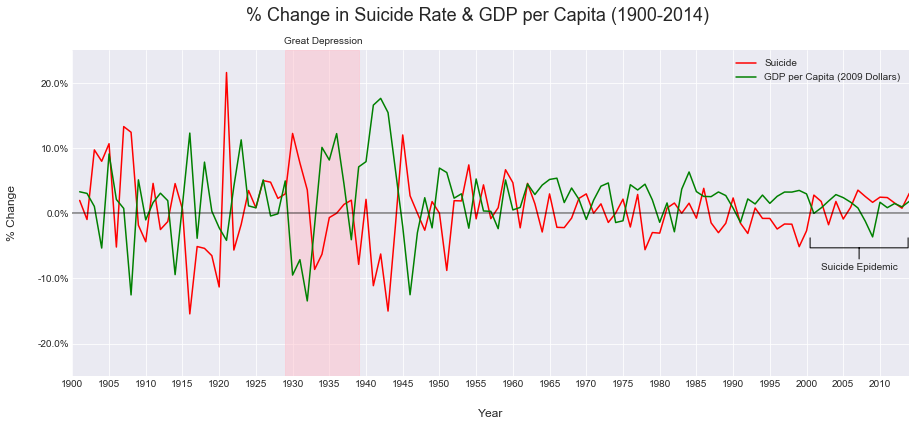

In [338]:
fig, ax = plt.subplots(figsize = (15,6))

#plot both statistics
suicide_gdp["Suicide % Change"].plot(ax = ax, label = "Suicide", color = "red" )
suicide_gdp["GDPC % Change"].plot(ax = ax, color = "green", label = "GDP per Capita")

#axis manipulation
ax.set_ylabel("% Change", labelpad=20, fontsize = 12)
ax.set_xlabel("Year", labelpad=20, fontsize = 12)
ax.set_xlim([1900, 2014])
ax.set_ylim([-25, 25])
vals = ax.get_yticks()
ax.set_yticklabels(['{:}%'.format(x) for x in vals]) #percent sign in the axis
loc = plticker.MultipleLocator(base=5.0) 
ax.xaxis.set_major_locator(loc) #this locator puts ticks every 5 years so we can read the chart better

#axis line to better visualize data
ax.axhline(y=0, color='k', alpha = 0.5)

#great depression annotation
ax.axvspan(1929, 1939, color='pink', alpha=0.5)
ax.annotate("Great Depression",(1928.77,26), xycoords='data', 
            annotation_clip=False, fontsize=10)

#suicide epidemic annotation
ax.annotate('Suicide Epidemic', xy=(0.94, .40), xytext=(0.94, .32), xycoords='axes fraction', 
            fontsize=10, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=4.9, lengthB=1', lw=1))

#misc
fig.suptitle("% Change in Suicide Rate & GDP per Capita (1900-2014)", 
             fontsize = 18, weight="light")
ax.legend(["Suicide", "GDP per Capita (2009 Dollars)"], loc = "best")

### Conclusions

As we can see from the graphic above, the trend is, when GDP per capita spikes up, suicide rate spikes down and vice versa. We especially see this in the Great Depression, which I highlighted above. GDP per capita, took a heavy hit and the suicide rate spiked from 12.8 before the Great Depression to 18.1 per 100,000 people. On "Black Thursday" alone, October 24th, 1929, over [100 people](https://www.washingtonpost.com/archive/opinions/1987/10/25/the-jumpers-of-29/17defff9-f725-43b7-831b-7924ac0a1363/?utm_term=.f13c1fa2c4d0) attempted to or committed suicide in the NYC metropolitan area. Surprisingly enough, through further research, it was found that suicides were prominent in both sides of the financial scale, rich and poor. The change from high to low estate provoked destruction more so than poverty itself.

Following the great depression, we see GDP per capita spike up due to WWII and as a result we see suicide rates drop as well to 14.2 per 100,000 people. And then following in 1940s and 1950s we see the cyclical movements of the economy and the suicide rates seem to match the trends perfectly. Decided to run a pair-wise correlation on our dataframe to display how suicides and GDP per capita are inversely correlated:

In [339]:
#Pair-wise correlation table
suicide_gdp.corr("pearson") 

,Suicide Deaths per 100000,GDPC,Suicide % Change,GDPC % Change
Suicide Deaths per 100000,1.000000,-0.293124,0.179273,-0.210215
GDPC,-0.293124,1.000000,-0.039365,-0.008436
Suicide % Change,0.179273,-0.039365,1.000000,-0.498693
GDPC % Change,-0.210215,-0.008436,-0.498693,1.000000


Right now, we are seeing a 50% inverse correlation between GDPC Change % and Suicide % Change, meaning that 50% of the change in suicide rate can be explained by the change in GDP. As we can conclude from this analysis, there is a high correlation between GDP per Capita and Suicide rate. Although, change in GDP doesn't explain all of the suicides, it does shed some light into how income level, or changes in income level can cause some people to contemplate suicide.
<br>
Following the 40s and 50s, it seems the inverse relationship starts to get a little messy and something other than GDP per capita must be affecting the suicide rate. This brings us to the suicide epidemic, which is actually happening at this very moment. Suicide rates have have risen in every age group except the elderly, according to the National Center for Health Statistics. Among women 45 to 64 it jumped an astounding 63 percent. For men that age, it was up 43 percent. There are several reasons for this epidemic: early deaths caused by drugs and alchohol, deteriorating job prospects, loneliness & the rise of social media, as well as lack of stable relationships.
<br>


## <u>Deaths as a function of Vehicle Miles Travelled over Time</u>

### Data Cleaning and Manipulation

As for the the next correlation, car-related deaths over time, there is a database online called the Fatality Analysis Reporting System ([FARS](https://www-fars.nhtsa.dot.gov/Main/index.aspx)) run by the National Highway Traffic Safety Administration (NHTSA) which is similar to the OECD iLibrary allowing me to pick certain parameters over a given time and allowing me to export into a CSV file which I can analyze. For this analysis, I will be studying how vehicle deaths have decreased over time, and how that affected the total amount of deaths. For instance, in times like the energy crisis, or great recession, will we see a decrease in the amount of vehicle related deaths?
<br>

Data from the FARS database exported as [this](https://raw.githubusercontent.com/ahilly/final_project/master/Vehicle%20Fatalities%20and%20Fatality%20Rates%201899-2015.csv).
<br>

**VMT, Vehicle Fatalities, Fatalities per 100 VMT:**

In [340]:
url4 = "/final_project/master/Vehicle%20Fatalities%20and%20Fatality%20Rates%201899-2015.csv"
vehicle_fatality = pd.read_csv(url1 + url4, header = 5) #read in the data from NHTSA
vehicle_fatality = vehicle_fatality.drop(["Unnamed: 4", "Unnamed: 5", "Millions.1", "VMT.1"],axis=1) #junk columns
vehicle_fatality.columns = ["Year", "Fatalities", "VMT (Millions)", "Fatalities per 100m VMT"] #readable columns
vehicle_fatality.set_index("Year", inplace=True)

#only want to analyze data where VMT is available
x = 1899
while x < 1921:
    vehicle_fatality = vehicle_fatality.drop([x])
    x = x + 1

vehicle_fatality.tail()

,Fatalities,VMT (Millions),Fatalities per 100m VMT
Year,,,
2011,"32,479","2,950,402",1.10
2012,"33,782","2,969,433",1.14
2013,"32,893","2,988,280",1.10
2014,"32,744","3,025,656",1.08
2015,"35,092","3,095,373",1.13


**Total Population:**

Received historical population data via the US Census database [here](http://www.multpl.com/united-states-population/table) and the data I compiled exported as [this](https://raw.githubusercontent.com/ahilly/final_project/master/Population%20Statistics.csv).

In [341]:
url5 = "/final_project/master/Population%20Statistics.csv"
population = pd.read_csv(url1 + url5) #read in the population data
population.set_index("Year", inplace = True)
x = 1900
while x < 1921:
    population = population.drop([x])
    x = x + 1
population = population.drop([2016,2017])

In [342]:
vehicle_fatality.dtypes

Fatalities                  object
VMT (Millions)              object
Fatalities per 100m VMT    float64
dtype: object

**Data Manipulation:**

We aren't quite ready yet to do our analysis, there are a lot of different metrics and data we are analyzing overtime so we need to scale the data correctly so the dataframe can work graphically.

In [343]:
vehicle_fatality = vehicle_fatality.rename({"Fatalities per 100m VMT": "Deaths per billion VMT"}, axis=1)
vehicle_fatality["Deaths per billion VMT"] = vehicle_fatality["Deaths per billion VMT"]*10


vehicle_fatality = vehicle_fatality.rename({"VMT (Millions)": "VMT (10s of Billions)"}, axis=1)
vehicle_fatality["VMT (10s of Billions)"] = vehicle_fatality["VMT (10s of Billions)"].str.replace(",","")
#realized this column isn't in numeric form sp get rid of the commas so we can convert it from an object to float

vehicle_fatality["VMT (10s of Billions)"] = pd.to_numeric(vehicle_fatality["VMT (10s of Billions)"])
#convert to numeric form

vehicle_fatality["VMT (10s of Billions)"] = vehicle_fatality["VMT (10s of Billions)"]/10000
vehicle_fatality.head()

,Fatalities,VMT (10s of Billions),Deaths per billion VMT
Year,,,
1921,"13,253",5.5027,240.8
1922,"14,859",6.7697,219.5
1923,"17,870",8.4995,210.2
1924,"18,400",10.4838,175.5
1925,"20,771",12.2346,169.8


We are making one plot with two y-axes so we need to group the dataframes in the right way, all of the dataframes with the same scale on one dataframe and then the rest in another.

In [344]:
vehicle_population = pd.concat([vehicle_fatality, population], axis=1)

#we want to plot fatalities on its own axis
fatalities = vehicle_fatality.drop(["VMT (10s of Billions)","Deaths per billion VMT" ], axis=1)

#we want to plot the rest of the metrics on another
vehicle_population = vehicle_population.drop(["Fatalities"],axis=1) 

#convert all the variables to the necessary data types
vehicle_population["Population"] = vehicle_population["Population"].str.replace("million","")
vehicle_population["Population"] = pd.to_numeric(vehicle_population["Population"])

fatalities["Fatalities"] = fatalities["Fatalities"].str.replace(",","")
fatalities["Fatalities"] = pd.to_numeric(fatalities["Fatalities"])
vehicle_population.dtypes

VMT (10s of Billions)     float64
Deaths per billion VMT    float64
Population                float64
dtype: object

### Data Presentation

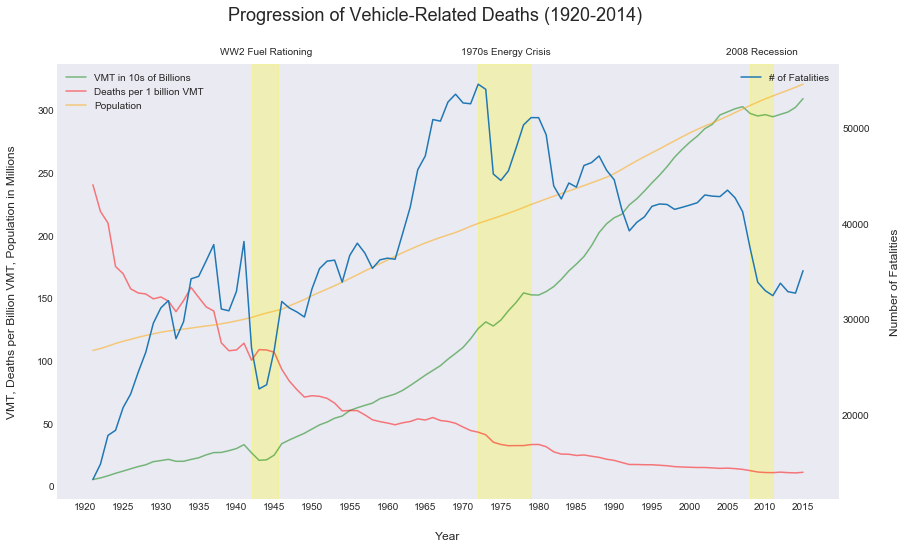

In [345]:


sns.set_style("dark")#change the style for this one, the grids get messy

fig, ax1 = plt.subplots(figsize=(14,8))

#plot vmt, deaths per billion VMT, 
ax1.plot(vehicle_population["VMT (10s of Billions)"],color = "green", alpha = 0.5)
ax1.plot(vehicle_population["Deaths per billion VMT"],color = "red", alpha = 0.5)
ax1.plot(vehicle_population["Population"],color = "orange", alpha = 0.5)
ax1.set_ylabel("VMT, Deaths per Billion VMT, Population in Millions", labelpad=20, fontsize = 12)
ax1.set_xlabel("Year", labelpad=20, fontsize = 12)


#plot # of fatalities
ax2 = ax1.twinx()
ax2.plot(fatalities)
ax2.set_ylabel("Number of Fatalities", labelpad = 20, fontsize = 12)

#year frequency
loc1 = plticker.MultipleLocator(base=5.0) 
ax1.xaxis.set_major_locator(loc1)

#highlights/annotations
ax1.axvspan(1942, 1945.5, color='Yellow', alpha=0.25)
ax1.annotate("WW2 Fuel Rationing",(1937.77,345), xycoords='data', 
            annotation_clip=False, fontsize=10)
ax1.axvspan(1972, 1979, color='Yellow', alpha=0.25)
ax1.annotate("1970s Energy Crisis",(1969.77,345), xycoords='data', 
            annotation_clip=False, fontsize=10)
ax1.axvspan(2008, 2011, color='Yellow', alpha=0.25)
ax1.annotate("2008 Recession",(2004.77,345), xycoords='data', 
            annotation_clip=False, fontsize=10)

#misc
fig.suptitle("Progression of Vehicle-Related Deaths (1920-2014)", 
             fontsize = 18, weight="light")
ax1.legend(["VMT in 10s of Billions", "Deaths per 1 billion VMT","Population" ], loc = "upper left")
ax2.legend(["# of Fatalities" ], loc = "best")


### Conclusions

There is a lot going on this graph, I will admit. However, the most interesting part about this analysis are the shaded areas. According to my hypothesis, I was half right. People did die from cars less due to financial crises causing them to have lower VMT number, however, I completely forgot about the WW2 Fuel Rationing and the 1970s Energy Crisis.
<br>

Nearly a year after the Japanese raid on Pearl Harbor that brought the United States fully into World War II, the Americans get around to imposing nationwide gasoline rationing in order to fulfill the United State's rubber shortage.  The 1970s energy crisis was when when the major industrial countries of the world faced substantial petroleum shortages, real and perceived, as well as elevated prices due to shocks in the Middle East. 
<br>

As a result of both these events, you see a steep decline in VMT (Green), Fatalaties (Blue), and a slight decline in Deaths per Billion VMT (Red). However, another interesting point, that in the long run, although the US Population is increasing (Yellow) and VMT is increasing (Green), we are seeing a decline in fatalities (Blue) which shows us that car safety has improved, and the increased regulation advocating for car safety has kept people safer from vehicle accidents. 
<br>

## <u>Cause of death over time</u>

### Data Cleaning and Manipulation

For this particular analysis, I will be using data from OECD's STAT [Database](http://stats.oecd.org/Index.aspx?QueryId=30115#), they only have data going back to 1960, however, that is fine enough for this statistical analysis as a lot has changed over the the past 50 years in regards to cause of mortality. It exported as this [file](https://github.com/ahilly/final_project/blob/master/Cause%20of%20Mortality%20-%20OECD.csv), easy to deal with.

In [346]:
url6 = "/final_project/master/Cause%20of%20Mortality%20-%20OECD.csv"
mortality = pd.read_csv(url1+url6)
mortality.set_index("Year", inplace=True)

**Put everything in terms of percentages/shares:**

In [347]:
mortality["Certain infectious and parasitic diseases"] = mortality["Certain infectious and parasitic diseases"]/mortality["All causes of death"]*100
mortality["Diseases of the blood and blood-forming organs"] = mortality["Diseases of the blood and blood-forming organs"]/mortality["All causes of death"]*100
mortality["Endocrine, nutritional and metabolic diseases"] = mortality["Endocrine, nutritional and metabolic diseases"]/mortality["All causes of death"]*100
mortality["Mental and behavioural disorders"] = mortality["Mental and behavioural disorders"]/mortality["All causes of death"]*100
mortality["Diseases of the nervous system"] = mortality["Diseases of the nervous system"]/mortality["All causes of death"]*100
mortality["Diseases of the circulatory system"] = mortality["Diseases of the circulatory system"]/mortality["All causes of death"]*100
mortality["Diseases of the respiratory system"] = mortality["Diseases of the respiratory system"]/mortality["All causes of death"]*100
mortality["Diseases of the digestive system"] = mortality["Diseases of the digestive system"]/mortality["All causes of death"]*100
mortality["Certain conditions originating in the perinatal period"] = mortality["Certain conditions originating in the perinatal period"]/mortality["All causes of death"]*100
mortality["Congenital malformations and chromosomal abnormalities"] = mortality["Congenital malformations and chromosomal abnormalities"]/mortality["All causes of death"]*100
mortality["Accidents"] = mortality["Accidents"]/mortality["All causes of death"]*100
mortality["Intentional self-harm"] = mortality["Intentional self-harm"]/mortality["All causes of death"]*100

### Data Presentation

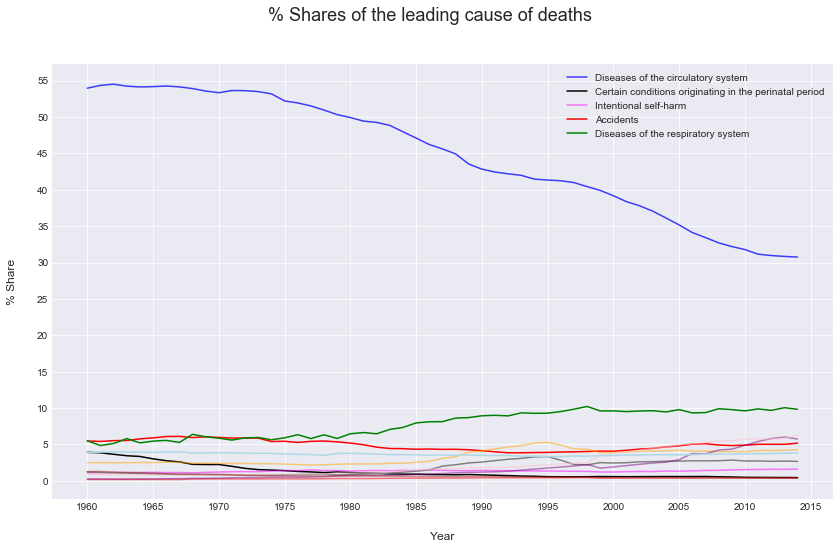

In [381]:
sns.set_style("darkgrid")#change the style for this one, the grids get messy
fig, ax3 = plt.subplots(figsize=(14,8))

#Plot all the variables in different colors
ax3.plot(mortality["Diseases of the circulatory system"],color = "blue", alpha = 0.75)
ax3.plot(mortality["Certain conditions originating in the perinatal period"],color = "black", alpha = 1)
ax3.plot(mortality["Intentional self-harm"],color = "magenta", alpha = 0.5)
ax3.plot(mortality["Accidents"],color = "red", alpha = 1)
ax3.plot(mortality["Diseases of the respiratory system"],color = "green", alpha = 1)
ax3.plot(mortality["Diseases of the blood and blood-forming organs"],color = "red", alpha = 0.5)
ax3.plot(mortality["Certain infectious and parasitic diseases"],color = "gray", alpha = 1)
ax3.plot(mortality["Endocrine, nutritional and metabolic diseases"],color = "orange", alpha = 0.5)
ax3.plot(mortality["Mental and behavioural disorders"],color = "purple", alpha = 0.5)
ax3.plot(mortality["Diseases of the nervous system"],color = "pink", alpha = 0.5)
ax3.plot(mortality["Diseases of the digestive system"],color = "lightblue", alpha = 1)
ax3.plot(mortality["Congenital malformations and chromosomal abnormalities"],color = "brown", alpha = 0.5)



#axes
loc1 = plticker.MultipleLocator(base=5) 
ax3.xaxis.set_major_locator(loc1) #5 year increments
loc2 = plticker.MultipleLocator(base=5) 
ax3.yaxis.set_major_locator(loc2) #5 year increments
ax3.set_ylabel("% Share", labelpad=20, fontsize = 12)
ax3.set_xlabel("Year", labelpad=20, fontsize = 12)

#misc
fig.suptitle("% Shares of the leading cause of deaths", 
             fontsize = 18, weight="light")
ax3.legend(["Diseases of the circulatory system", "Certain conditions originating in the perinatal period", "Intentional self-harm" , "Accidents","Diseases of the respiratory system"], loc = "best")


### Conclusions

The results from this graphical analysis are fairly simple. The one thing which really sticks out is that diseases of the cirulatory systen (dark blue) such as various heart diseases have been on the decline since 1960. Additionally, car accidents (red) have been decreasing in both absolute terms and relative terms as it has been decreasing thanks to to improvements in car safety and technology as mentioned in the previous study as well. Another positive is that diseases stemming from the youth from lack of vaccination such as Polio (black), have been on the decline also thanks to the cure developed in the 1950s and the widespred acceptance of the cure. 

On the other hand, we see an increase in deaths via self-harm (pink) and this was proven in our 1st study as well. We are currently in the middle of suicide epidemic. Additionally, respiratory diseases (green) such as the flu, are increasing as the there isn't a permanent cure to the disease and it keeps getting stronger year after year, especially targeting older people whose immune systems can't withstand such shock.

## <u> Concluding Remarks </u>

I chose deaths because it's an interesting topic to study and the data for most health statistics are always readily available by the OECD, WHO, or some other government/non-government organization. I couldn't be more wrong, some of this data was extremely hard to find, I was shocked to see that these organizations only started keeping track of these statistics electronically in the 1990s. This project was particular difficult because we had to do data manipulation for three different correlations, however, a learned a lot throughout the proccess and am glad I went through the troubleshooting on my own. Now on to some interesting findings from my research and analysis:<br>

1. Suicides and self harm are on the rise, and we saw that in our first study displaying the inverse relationship between GDP per Capita and suicide per 100,000 people as well in the last study where we looked at the overall causes of death. In the first study, we saw a 50% correlation between GDP per Capita and suicide rate, highlighted by our findings during the Great Depression and the decline of suicides in the 1940s.
<br><br>
2. Vehicle deaths are on the decline thanks to improvements in car safety, healthcare, and technology. Something interesting from the second analysis was the fact that car use significantly decreased in times of economic stress, as well as the WWII Fuel Rationing and the 1970s energy crisis. 
<br><br>
3. Perinatal diseases and diseases of the ciruclatory system are on the decline thanks to advancedment of medecine and the development of cures/vaccines. However, respiratory diseases, intentional self-harm, drug overdose are all causes of mortality on the rise in recent years. 


That being said, I wanted to thank you for a great semester, I learned plenty in this class and have been happy to have learned so much because these data analystical and processing skills are crucial in whatever job in Economics/Finance I end up being after undergrad. I hope you enjoy this interesting study and I wish you a great summer!